In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('wine-quality.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


And we are going to draw the hist of fixed_acididy

| 类型 | 名称 |
| :----: | :----: |
| 直方图 | hist |
| 散点图 | scatter | 
| ... | line |
| ... | bar |
| ... | barh |
| ... | box |
| ... | kde |
| ... | density |
| ... | area |
| ,,, | pie |
|...| hexbib |


<AxesSubplot:>

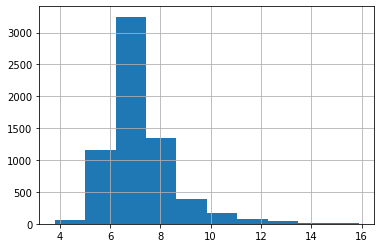

In [7]:
df.fixed_acidity.hist()

<AxesSubplot:>

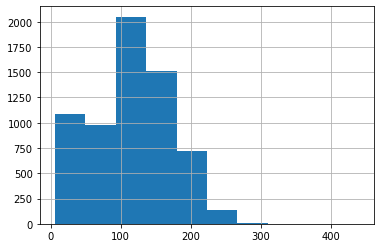

In [4]:
df.total_sulfur_dioxide.hist()

<AxesSubplot:>

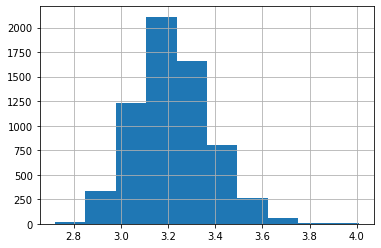

In [5]:
df.pH.hist()

<AxesSubplot:>

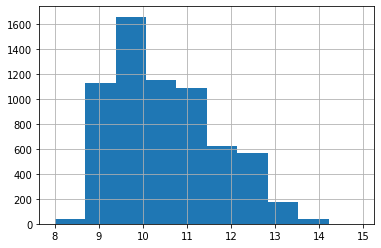

In [6]:
df.alcohol.hist()

draw scatter

<AxesSubplot:xlabel='volatile_acidity', ylabel='quality'>

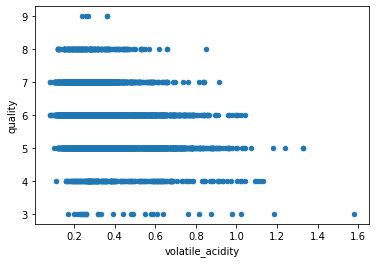

In [7]:
df.plot(
    x = "volatile_acidity",
    y = "quality",
    kind = "scatter")

<AxesSubplot:xlabel='residual_sugar', ylabel='quality'>

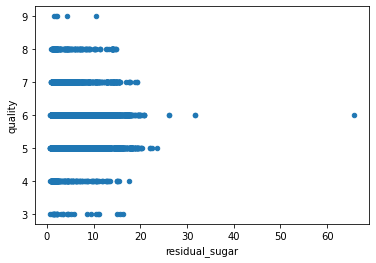

In [8]:
df.plot(
    x = "residual_sugar",
    y = "quality",
    kind = "scatter")

<AxesSubplot:xlabel='pH', ylabel='quality'>

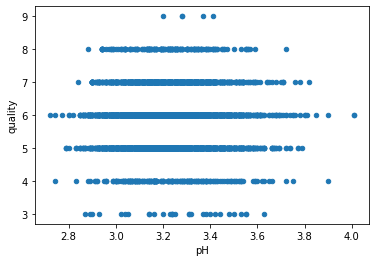

In [9]:
df.plot(
    x = "pH",
    y = "quality",
    kind = "scatter",
    legend = True)

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

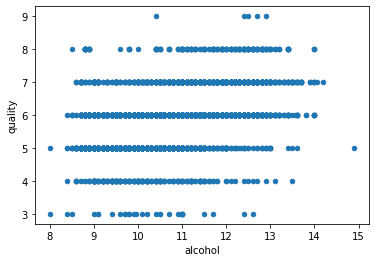

In [10]:
df.plot(
    x = "alcohol",
    y = "quality",
    kind = "scatter")

## Drawing Conclusions Using Groupby
In the notebook below, you're going to investigate two questions about this data using pandas' groupby function. Here are tips for answering each question:

### Q1: Is a certain type of wine (red or white) associated with higher quality?
For this question, compare the average quality of red wine with the average quality of white wine with groupby. To do this group by color and then find the mean quality of each group.

In [26]:
df.groupby('wine_color').quality.mean()

wine_color
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [28]:
df.groupby('quality').pH.mean()

quality
3    3.257667
4    3.231620
5    3.212189
6    3.217726
7    3.228072
8    3.223212
9    3.308000
Name: pH, dtype: float64

### Q2: What level of acidity (pH value) receives the highest average rating?
This question is more tricky because unlike `color`, which has clear categories you can group by (red and white) `pH` is a quantitative variable without clear categories. However, there is a simple fix to this. You can create a categorical variable from a quantitative variable by creating your own categories. pandas' cut function let's you "cut" data in groups. Using this, create a new column called `acidity_levels` with these categories:

#### Acidity Levels:
1. High: Lowest 25% of pH values
2. Moderately High: 25% - 50% of pH values
3. Medium: 50% - 75% of pH values
4. Low: 75% - max pH value

In [12]:
df.pH.describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [13]:
# 指定多个区间
# 根据题目的意思我们选0-25%, 50%-75%, 75%以上
bin_edge = [0, 3.11, 3.21, 3.32, 4.01]

In [14]:
# 指定每个区间的名字
bin_name = ['Low', 'Medium', 'Mod High', 'High']

In [19]:
ph_cut = pd.cut(df['pH'], bin_edge, labels=bin_name)
ph_cut

0           High
1         Medium
2       Mod High
3         Medium
4           High
          ...   
6492    Mod High
6493      Medium
6494         Low
6495        High
6496    Mod High
Name: pH, Length: 6497, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'Mod High' < 'High']

In [20]:
df['acidity_levels'] = ph_cut
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,High
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Mod High
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,High


C:\Users\Rain\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


fixed_acidity            6.769949
volatile_acidity         0.403815
citric_acid              0.243901
residual_sugar           3.848983
chlorides                0.058777
free_sulfur_dioxide     26.327510
total_sulfur_dioxide    93.244917
density                  0.994899
pH                       3.433348
sulphates                0.574136
alcohol                 10.656057
quality                  5.859593
dtype: float64

### Q3: Do sweeter wines (more residual sugar) receive better ratings?
### Q4: Do wines with higher alcoholic content receive better ratings?

对于这一部分我们的分析和处理过程如下：
1. 首先找到`alcoholic`和`sweet`的中位数
2. 将低于中位数的列为低酒精度，高于中位数的列为高酒精度（甜度相同）
3. 计算低和高的`quality`均值

In [29]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,High
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Mod High
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,High


In [33]:
df.alcohol.median()

10.3

In [35]:
high_alco = df.query('alcohol > 10.3')

In [36]:
low_alco = df.query('alcohol <= 10.3')

In [38]:
high_alco.quality.mean(), low_alco.quality.mean()

(6.161773891317926, 5.484673748103186)

通过上面的结果我们可以看出高酒精度的酒的质量更高

In [39]:
df.residual_sugar.median()

3.0

In [40]:
high_sugar = df.query('residual_sugar > 3.0')

In [41]:
low_sugar = df.query('residual_sugar <= 3.0')

In [42]:
high_sugar.quality.mean(), low_sugar.quality.mean()

(5.829306071871128, 5.8075864178647905)

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
colors=  ['red','white']
color_means = df.groupby('wine_color').quality.mean()

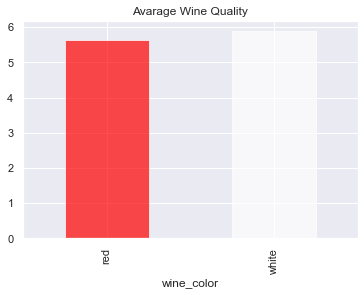

In [67]:
color_means.plot(kind = 'bar', color = colors, title = 'Avarage Wine Quality', alpha = .7)
sns.set_style('darkgrid')


In [69]:
df_counts = df.groupby(['quality', 'wine_color']).count()
df_counts

fixed_acidity  volatile_acidity  citric_acid  \
quality wine_color                                                 
3       red                    10                10           10   
        white                  20                20           20   
4       red                    53                53           53   
        white                 163               163          163   
5       red                   681               681          681   
        white                1457              1457         1457   
6       red                   638               638          638   
        white                2198              2198         2198   
7       red                   199               199          199   
        white                 880               880          880   
8       red                    18                18           18   
        white                 175               175          175   
9       white                   5                 5            5   

                    residual_sugar  chlorides  free_sulfur_dioxide  \
quality wine_color                                                   
3       red                     10         10                   10   
        white                   20         20                   20   
4       red                     53         53                   53   
        white                  163        163                  163   
5       red                    681        681                  681   
        white                 1457       1457                 1457   
6       red                    638        638                  638   
        white                 2198       2198                 2198   
7       red                    199        199                  199   
        white                  880        880                  880   
8       red                     18         18                   18   
        white                  175        175                  175   
9       white                    5          5                    5   

                    total_sulfur_dioxide  density    pH  sulphates  alcohol  \
quality wine_color                                                            
3       red                           10       10    10         10       10   
        white                         20       20    20         20       20   
4       red                           53       53    53         53       53   
        white                        163      163   163        163      163   
5       red                          681      681   681        681      681   
        white                       1457     1457  1457       1457     1457   
6       red                          638      638   638        638      638   
        white                       2198     2198  2198       2198     2198   
7       red                          199      199   199        199      199   
        white                        880      880   880        880      880   
8       red                           18       18    18         18       18   
        white                        175      175   175        175      175   
9       white                          5        5     5          5        5   

                    acidity_levels  
quality wine_color                  
3       red                     10  
        white                   20  
4       red                     53  
        white                  163  
5       red                    681  
        white                 1457  
6       red                    638  
        white                 2198  
7       red                    199  
        white                  880  
8       red                     18  
        white                  175  
9       white                    5

In [70]:
counts = df_counts.pH
counts

quality  wine_color
3        red             10
         white           20
4        red             53
         white          163
5        red            681
         white         1457
6        red            638
         white         2198
7        red            199
         white          880
8        red             18
         white          175
9        white            5
Name: pH, dtype: int64

<AxesSubplot:title={'center':'Counts by wine color and quality'}, xlabel='quality,wine_color'>

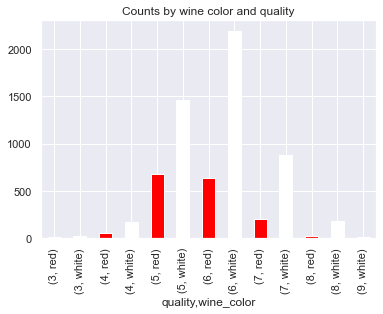

In [84]:
counts.plot(kind = 'bar', color = colors, title = 'Counts by wine color and quality')

In [81]:
totals =  df.groupby('wine_color').count().pH
totals

wine_color
red      1599
white    4898
Name: pH, dtype: int64

<AxesSubplot:title={'center':'Counts by wine color and quality'}, xlabel='quality,wine_color'>

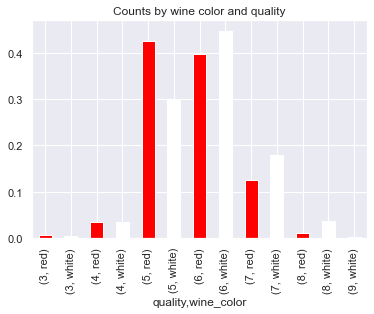

In [83]:
proportions = counts / totals
labels = ['3', '4', '5', '6', '7', '8', '9'] 
proportions.plot(y = labels, kind = 'bar', color = colors, title = 'Counts by wine color and quality')